In [11]:
library("DESeq2")

library("ggplot2")

library("RColorBrewer")

In [12]:
countFile <- '~/projects/counts_for_deseq2.csv'
counts <- read.csv(countFile,
                  header=TRUE, row.names=1)

counts$Length <- NULL

head(counts)

,lin28b_ctrl_rep1,lin28b_ctrl_rep2,lin28b_kd_rep1,lin28b_kd_rep2
ENSG00000223972.4,0,2,0,0
ENSG00000227232.4,294,294,334,410
ENSG00000243485.2,0,0,0,0
ENSG00000237613.2,0,2,4,7
ENSG00000268020.2,0,0,0,0
ENSG00000240361.1,0,0,0,0


In [13]:
colFile <- '/home/ucsd-train16/scratch/processed_data/conditions_matrix_deseq2.csv'
col_data <- read.csv(colFile,
                  header=TRUE, row.names=1)

head(col_data)

,condition
lin28b_ctrl_rep1,control
lin28b_ctrl_rep2,control
lin28b_kd_rep1,knockdown
lin28b_kd_rep2,knockdown


In [14]:
dds <- DESeqDataSetFromMatrix(countData = counts,
                              colData = col_data,
                              design = ~ condition)

In [15]:
dds

class: DESeqDataSet 
dim: 57820 4 
metadata(1): version
assays(1): counts
rownames(57820): ENSG00000223972.4 ENSG00000227232.4 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(0):
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(1): condition

### filter gene expressions

In [17]:
head(counts(dds))

,lin28b_ctrl_rep1,lin28b_ctrl_rep2,lin28b_kd_rep1,lin28b_kd_rep2
ENSG00000223972.4,0,2,0,0
ENSG00000227232.4,294,294,334,410
ENSG00000243485.2,0,0,0,0
ENSG00000237613.2,0,2,4,7
ENSG00000268020.2,0,0,0,0
ENSG00000240361.1,0,0,0,0


In [16]:
rowSums(head(counts(dds))) > 4

ENSG00000223972.4 ENSG00000227232.4 ENSG00000243485.2 ENSG00000237613.2 
            FALSE              TRUE             FALSE              TRUE 
ENSG00000268020.2 ENSG00000240361.1 
            FALSE             FALSE

In [18]:
dds <- dds[ rowSums(counts(dds)) > 4, ]

In [20]:
dds <- DESeq(dds)

estimating size factors
estimating dispersions
gene-wise dispersion estimates
mean-dispersion relationship
final dispersion estimates
fitting model and testing


In [19]:
dds

class: DESeqDataSet 
dim: 20367 4 
metadata(1): version
assays(1): counts
rownames(20367): ENSG00000227232.4 ENSG00000237613.2 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(0):
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(1): condition

In [21]:
dds

class: DESeqDataSet 
dim: 20367 4 
metadata(1): version
assays(3): counts mu cooks
rownames(20367): ENSG00000227232.4 ENSG00000237613.2 ...
  ENSG00000210195.2 ENSG00000210196.2
rowData names(27): baseMean baseVar ... deviance maxCooks
colnames(4): lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
  lin28b_kd_rep2
colData names(2): condition sizeFactor

In [26]:
#as.data.frame(res)

In [22]:
res <- results(dds)

outFname = "~/projects/differential_expression.csv"
write.csv(as.data.frame(res), file=outFname)

summary(res)


out of 20367 with nonzero total read count
adjusted p-value < 0.1
LFC > 0 (up)     : 749, 3.7% 
LFC < 0 (down)   : 1131, 5.6% 
outliers [1]     : 0, 0% 
low counts [2]   : 11846, 58% 
(mean count < 211)
[1] see 'cooksCutoff' argument of ?results
[2] see 'independentFiltering' argument of ?results



In [37]:
res_df <- as.data.frame(res)

## Add Hugo gene names

In [44]:
gene_dir = '/home/ucsd-train16/scratch/annotations/hg19/'
gene_names <- read.table(paste0(gene_dir,"gencode.v19.annotation.genenames.txt"),
                         header=FALSE, row.names=1)

In [68]:
gene_names$gene_ensbl = rownames(gene_names)

res_df$gene_ensbl = rownames(res_df)

In [72]:
res_df_genes = merge(res_df,gene_names,by = 'gene_ensbl')

In [74]:
dim(res_df_genes)

[1] 20367     8

## Filter genes by p < 0.05

In [75]:
sig_gens <- res_df[which(res_df$padj < 0.05),]

In [76]:
write.csv(sig_gens,'~/projects/significant_genes_R.csv')

## Plot

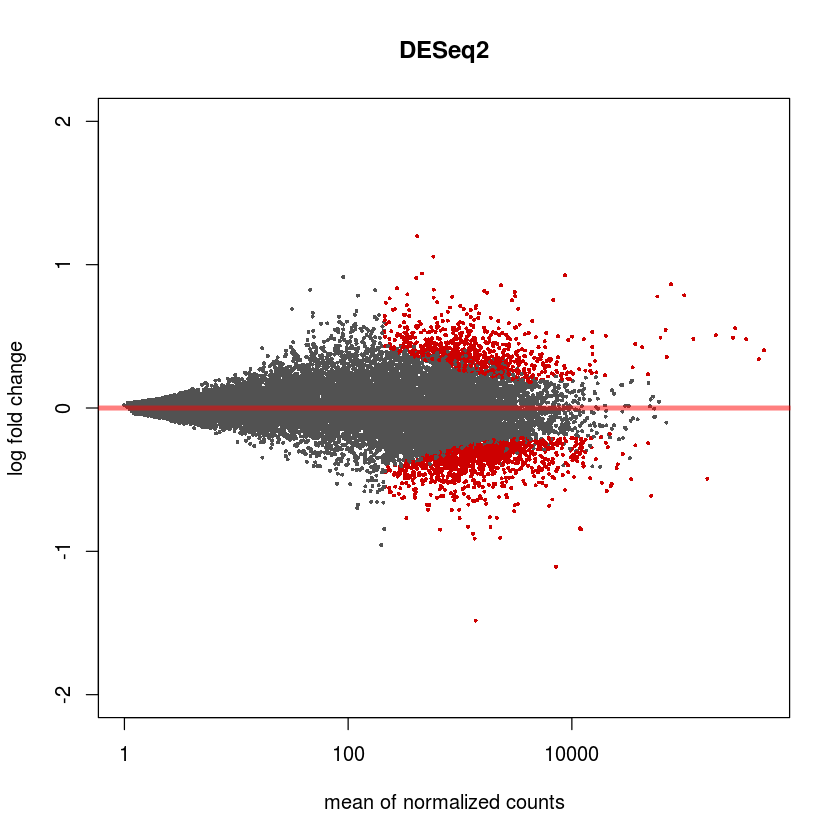

In [27]:
plotMA(res, main="DESeq2", ylim=c(-2,2))


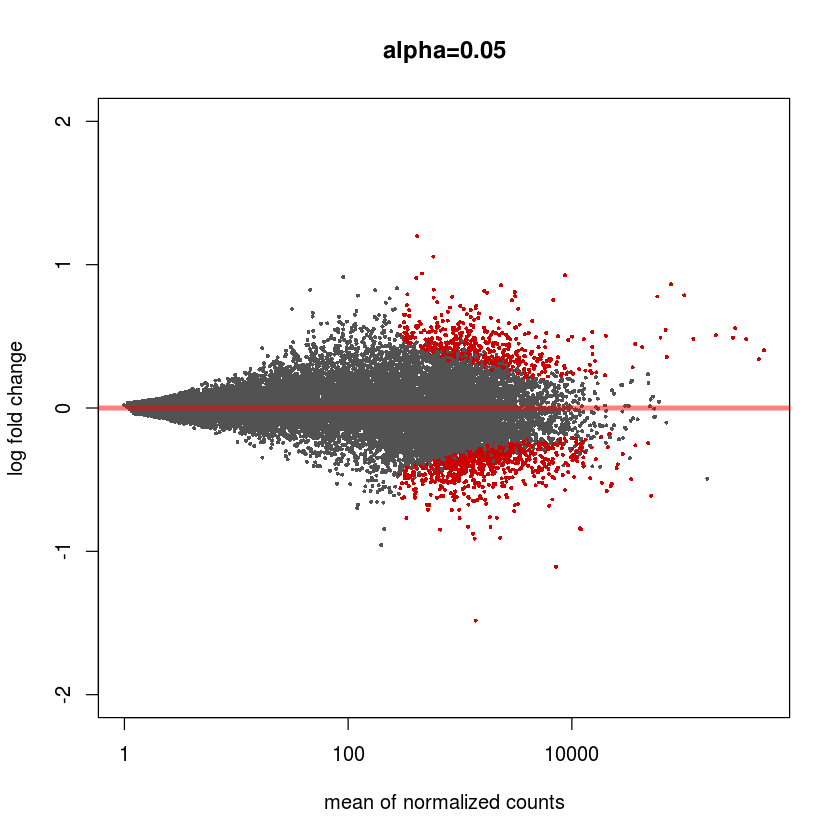

In [28]:
res05 <- results(dds, alpha=0.05)

plotMA(res05, main="alpha=0.05", ylim=c(-2,2))


In [30]:
rld <- rlog(dds)
vsd <- varianceStabilizingTransformation(dds)

data <- plotPCA(rld, intgroup="condition", returnData=TRUE)
percentVar <- round(100 * attr(data, "percentVar"))

In [31]:
data

,PC1,PC2,group,condition,name
lin28b_ctrl_rep1,-9.643539,0.6642992,control,control,lin28b_ctrl_rep1
lin28b_ctrl_rep2,1.805480,-3.8890278,control,control,lin28b_ctrl_rep2
lin28b_kd_rep1,4.454663,2.3497597,knockdown,knockdown,lin28b_kd_rep1
lin28b_kd_rep2,3.383396,0.8749689,knockdown,knockdown,lin28b_kd_rep2


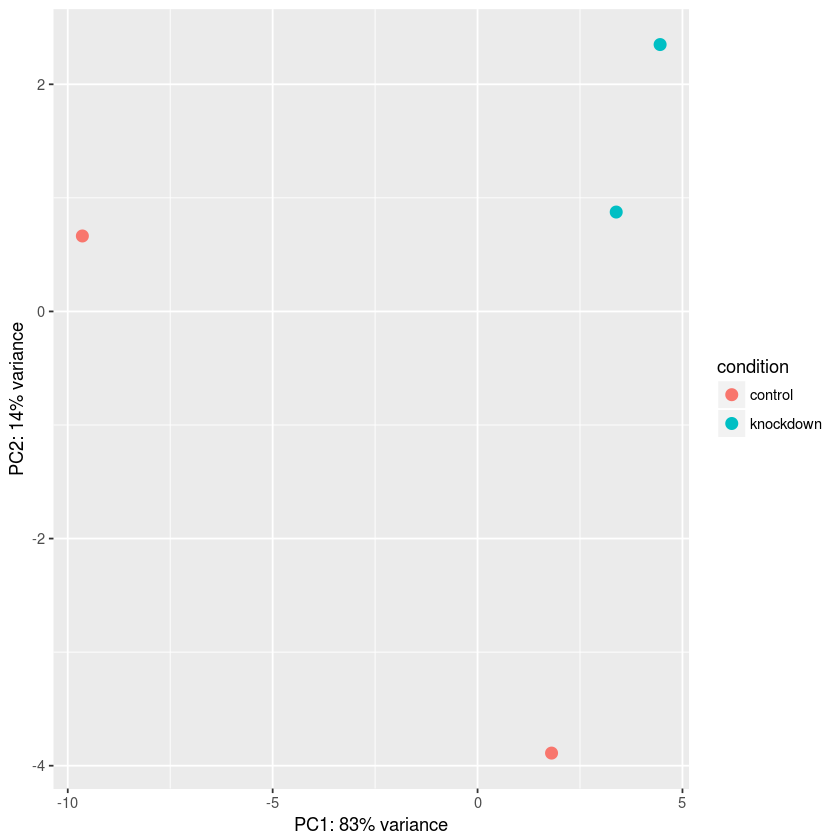

In [32]:
ggplot(data, aes(PC1, PC2, color=condition)) +
    geom_point(size=3) +
    xlab(paste0("PC1: ",percentVar[1],"% variance")) + 
    ylab(paste0("PC2: ",percentVar[2],"% variance"))

In [13]:
percentVar

[1] 83 14

In [34]:
dist(t(assay(rld)))

                 lin28b_ctrl_rep1 lin28b_ctrl_rep2 lin28b_kd_rep1
lin28b_ctrl_rep2        15.764386                                
lin28b_kd_rep1          22.036714        14.520010               
lin28b_kd_rep2          18.954493        11.805623       8.316198

Warning message in plot.window(...):
""clustering_distance_rows" is not a graphical parameter"Warning message in plot.window(...):
""clustering_distance_cols" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""clustering_distance_rows" is not a graphical parameter"Warning message in plot.xy(xy, type, ...):
""clustering_distance_cols" is not a graphical parameter"Warning message in title(...):
""clustering_distance_rows" is not a graphical parameter"Warning message in title(...):
""clustering_distance_cols" is not a graphical parameter"

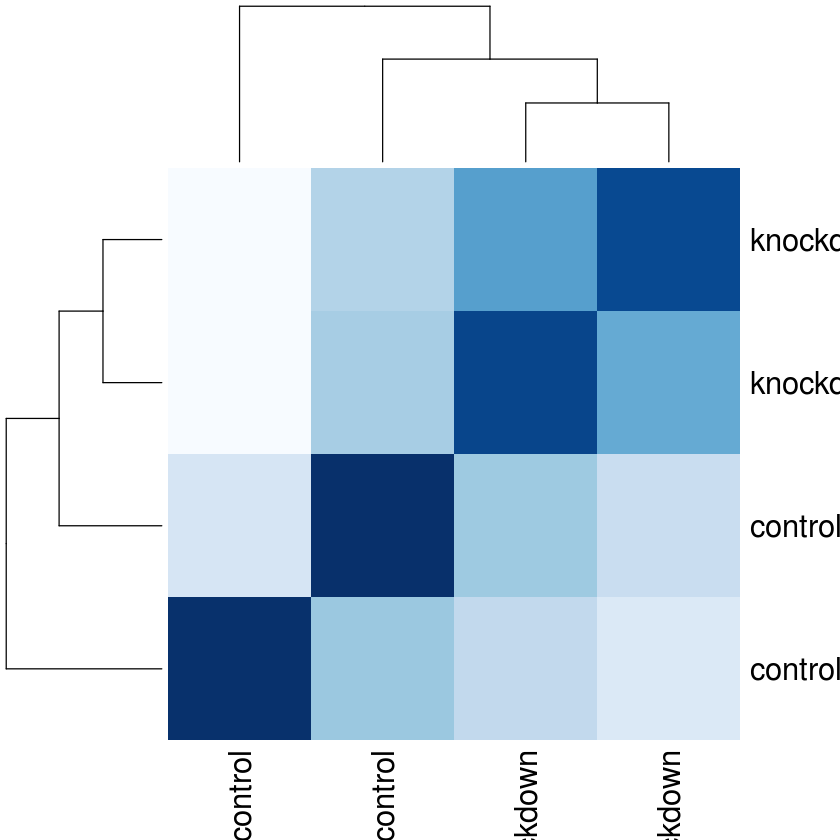

In [36]:
sampleDists <- dist(t(assay(rld)))

sampleDistMatrix <- as.matrix(sampleDists)

rownames(sampleDistMatrix) <- paste(rld$condition)

colnames(sampleDistMatrix) <- paste(rld$condition)

colors <- colorRampPalette( rev(brewer.pal(9, "Blues")) )(255)

heatmap(sampleDistMatrix,
clustering_distance_rows=sampleDists,
clustering_distance_cols=sampleDists,
col=colors)